# Pandas 2:  Cleaning data 

Probably the best thing about Pandas is its extensive toolset for managing data.  Here we describe features of Pandas that allow us to clean data that, for reasons beyond our control, comes in a form that's not immediately amendable to analysis. This is the first of several such notebooks.  

Outline:  

* [Want operator](#want).  Start with what we want to end up, then figure out how to get there.  
* [String methods](#strings).  Fixing string variables, especially strings that should really be numbers.  
* [Missing values](#missing).  Marking, dropping, counting missing values.    
* [Selecting variables and observations](#selection).  Choose the variables and observations we want by their labels.
* [Boolean selection](#boolean).  This is mostly what we do:  choose observations from conditions.  We use comparisons to produce Boolean variables and then use the Boolean variables to select observations that are `True`.  The next two methods extend this capability.  
* [The `isin` method](#isin).  Choose observations whose values are in lists you specify. 
* [The `contains` method](#contains).  Flag observations that contain a specific piece of text.  Another string method, operates through Booleans.  

<!--
* [The `query` method](#query).  Similar capability using database syntax.  This is one of many examples in which **SQL database** tools have been built into Pandas.  
--> 

<!--
* [Indexing](#index).  Setting and resetting the index.  Multi-indexes. 
* [Switching rows and columns](#pivot).  Transpose.  Pivot and melt.  
* [Stack and unstack](#stack).  Managing column structure and labels.  Melt.  
--> 

**Note: requires internet access to run.**  

<!-- 
internal links http://sebastianraschka.com/Articles/2014_ipython_internal_links.html
-->

This IPython notebook was created by Dave Backus, Chase Coleman, and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

<a id=prelims></a>

## Preliminaries 

In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 

%matplotlib inline                     

# check versions (overkill, but why not?)
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.1 |Anaconda 2.5.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Today:  2016-04-08


<a id=want></a>

## The want operator 

We need to know what we're trying to do -- what we **want** the data to look like.  We say we **apply the want operator**.  

Some problems we've run across that ask to be solved:

* Numerical data is contaminated by commas (marking thousands) or dollar signs.  
* Row and column labels are contaminated.  
* Missing values are marked erratically.  
* We have too much data, would prefer to choose a subset.  
* Variables run across rows rather than down columns.  

What we want in each case is the opposite of what we have:  we want nicely formatted numbers, clean row and column labels, and so on.  

We'll solve the first four problems here, the last one in the next notebook.  

### Example:  Chipotle data 

This data comes from a [New York Times story]((http://www.nytimes.com/interactive/2015/02/17/upshot/what-do-people-actually-order-at-chipotle.html) about the number of calories in a typical order at Chipotle.  The topic doesn't particularly excite us, but the data raises a number of issues that come up repeatedly. We adapt some code written by [Daniel Forsyth](http://www.danielforsyth.me/pandas-burritos-analyzing-chipotle-order-data-2/). 

In [2]:
url = 'https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv'
chp = pd.read_csv(url, sep='\t')   # tab (\t) delimited 
print('Variable dtypes:\n', chp.dtypes, sep='')
chp.head()

Variable dtypes:
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


**Comment.** Note that the variable `item_price` has dtype object. The reason is evidently the dollar sign.  We'd prefer to have it as a number, specifically a float.  

### Example:  Data Bootcamp entry poll

This is the [poll](https://docs.google.com/forms/d/1N7ugrqIQNHm_e1BLVAtaRMnC8SmSiTDMoYBy_0FYZic/viewform) we did at the start of the course.  Responses were collected in a Google spreadsheet, which we converted to a csv and uploaded to our website.  

In [3]:
pd.set_option("display.width", 80)

In [4]:
import pandas as pd
url1 = 'http://pages.stern.nyu.edu/~dbackus/Data/'
url2 = 'Data-Bootcamp-entry-poll_s16.csv'
url = url1 + url2 
ep = pd.read_csv(url, header=0) 
print('Dimensions:', ep.shape)
print('\nData types:\n', ep.dtypes, sep='')
ep.head(2) 

Dimensions: (104, 11)

Data types:
Timestamp                                                                                               object
What program are you enrolled in?                                                                       object
What career path most interests you?                                                                    object
How much programming experience have you had?                                                           object
How much experience with probability and statistics have you had?                                       object
Do you use social media for information purposes?  Check all that apply.                                object
Other comments (optional)                                                                              float64
What is your expected major or concentration?                                                           object
What kinds of data most interest you?  List any that cross your mind.        

,Timestamp,What program are you enrolled in?,What career path most interests you?,How much programming experience have you had?,How much experience with probability and statistics have you had?,Do you use social media for information purposes? Check all that apply.,Other comments (optional),What is your expected major or concentration?,What kinds of data most interest you? List any that cross your mind.,Why have you enrolled in this course?,If we have time -- and we may not -- what special topics would interest you? Check all that apply.
0,1/3/2016 4:43,Wharton UGR,Entrepreneurship,None,None,Twitter,NaN,Analytics or other quant,People Analytics,I lost my mind for a minute,Natural language processing
1,1/3/2016 9:36,MBA,"Technology (Google, Amazon, etc)",I have taken one programming course,I have taken one probability or statistics course,Twitter,NaN,Strategy & Finance,NaN,To help with my career,Natural language processing


**Comments.** This is mostly text data, which means it's assigned the dtype object.  Which is fine.  But there are two things that would make the data easier to work with:

* The column names are excessively verbose.  This one's easy:  We replace them with single words.  Which we do below.  
* The second one is harder.  Two of the questions -- social media and special topics -- say "mark all that apply."  In the spreadsheet, we have a list of every choice the person checked.  Our want is to count the number of each type of response.  For example, we might want a bar chart that gives us the number of each response.  The question is how we get there.  

In [5]:
# rename variables 
newnames = ['time', 'program', 'career', 'programming', 'stats', 'media',
             'other', 'major', 'data', 'why', 'topics']
newnames = [name.title() for name in newnames]             
ep.columns = newnames  
ep.head()

,Time,Program,Career,Programming,Stats,Media,Other,Major,Data,Why,Topics
0,1/3/2016 4:43,Wharton UGR,Entrepreneurship,None,None,Twitter,NaN,Analytics or other quant,People Analytics,I lost my mind for a minute,Natural language processing
1,1/3/2016 9:36,MBA,"Technology (Google, Amazon, etc)",I have taken one programming course,I have taken one probability or statistics course,Twitter,NaN,Strategy & Finance,NaN,To help with my career,Natural language processing
2,1/6/2016 14:12,Undergraduate business,Marketing,None,I have taken one probability or statistics course,Facebook,NaN,Marketing,survey data on consumer behaviors,To help with my career,Web scraping
3,1/16/2016 16:41,Undergraduate business,Finance,I have taken one programming course,I have taken one probability or statistics course,None,NaN,Finance,Sports data and demographic data,To help with my career,Web scraping
4,1/17/2016 23:29,MBA,"Technology (Google, Amazon, etc)",I have taken one programming course,I have taken many courses and/or have extensiv...,Twitter,NaN,Management,Sports data\nCampaign data 2016\nstart up fund...,To help with my career,Web scraping


In [6]:
# check multi-response question to see what we're dealing with 
ep['Media'].head(20)

0                           Twitter
1                           Twitter
2                          Facebook
3                              None
4                           Twitter
5                           Twitter
6                              None
7                              None
8                              None
9     Blog (RSS) reader, Backtweets
10                          Twitter
11                             None
12                             None
13                         facebook
14                             None
15                          Twitter
16                          Twitter
17                             None
18       Twitter, Blog (RSS) reader
19                         Facebook
Name: Media, dtype: object

**Comment.**  Note the commas separating answers with more than one choice.  We want to unpack them somehow.  

### Example:  OECD healthcare statistics 

The OECD collects [healthcare data](http://www.oecd.org/els/health-systems/health-data.htm) on lots of (mostly rich) countries, which is helpful in producing comparisons.  Here we use a [spreadsheet](http://www.oecd.org/health/health-systems/OECD-Health-Statistics-2015-Frequently-Requested-Data.xls) linked in one of their documents. 

In [7]:
url1 = 'http://www.oecd.org/health/health-systems/'
url2 = 'OECD-Health-Statistics-2015-Frequently-Requested-Data.xls'
docs = pd.read_excel(url1+url2, 
                     skiprows=3, 
                     usecols=[0, 51, 52, 53, 54, 55, 57],
                     sheetname='Physicians', 
#                     na_values=['..'],
                     skip_footer=21) 
print('Dimensions:', docs.shape)
print('\nIndex', docs.index.tolist(), sep='')
print('\nVariable dtypes:\n', docs.dtypes.tail(8), sep='')
docs.head()

Dimensions: (34, 7)

Index[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Variable dtypes:
Unnamed: 0                 object
2010                       object
2011                       object
2012                      float64
2013                       object
2014                       object
2013 (or nearest year)    float64
dtype: object


,Unnamed: 0,2010,2011,2012,2013,2014,2013 (or nearest year)
0,Australia 1,..,3.31,3.31,3.39,..,3.39
1,Austria 1,4.8,4.84,4.90,4.99,..,4.99
2,Belgium 1,2.92,2.91,2.93,2.95,..,2.95
3,Canada 2,2.37,2.44,2.50,2.55,..,2.55
4,Chile 3,1.43,1.58,1.74,1.88,2.02,1.88


**Comments.**  Here we have a couple issues.  

* The first column includes a space and a number:  `Australia 1`, `Chile 3`, etc.  We care about this because when we plot the data across countries, the country labels are going to be country names, so we want them in a better form than this.  
* The `..`'s in the sheet lead us to label any column that includes them as dtype object.  Here we want to label them as missing values.  
* If we want to plot each country against time, then we'll need to switch the rows and columns somehow, so that the x axis in the plot (the year) is the index and not the column label.  

One more thing before we proceeed:  change the name of the country variable. 

In [8]:
names = list(docs)
docs = docs.rename(columns={names[0]: 'Country'})
docs.head(2)

,Country,2010,2011,2012,2013,2014,2013 (or nearest year)
0,Australia 1,..,3.31,3.31,3.39,..,3.39
1,Austria 1,4.8,4.84,4.90,4.99,..,4.99


### Example:  World Economic Outlook 

The IMF's [World Economic Outlook database](https://www.imf.org/external/ns/cs.aspx?id=28) contains a broad range of macroeconomic data for a large number of countries.  It's updated twice a year and is a go-to source for things like current account balances (roughly, the trade balance) and government debt and deficits.  It also has a few quirks, as we'll see.  

**Example.** Run the following code as is, and with the `thousands` and `na_values` parameters commented out.  How do the dtypes differ?

In [9]:
url1 = 'http://www.imf.org/external/pubs/ft/weo/2015/02/weodata/'
url2 = 'WEOOct2015all.xls'
url = url1 + url2 
weo = pd.read_csv(url, sep='\t', 
                  usecols=[1,2,3,4,6,40,41,42,43,44], 
                  thousands=',', 
                  na_values=['n/a', '--']
                 )

print('Variable dtypes:\n', weo.dtypes, sep='')
weo.head()

Variable dtypes:
ISO                    object
WEO Subject Code       object
Country                object
Subject Descriptor     object
Units                  object
2011                  float64
2012                  float64
2013                  float64
2014                  float64
2015                  float64
dtype: object


,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,386.368,440.336,457.654,463.520,472.981
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,6.479,13.968,3.933,1.282,2.041
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361
3,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",U.S. dollars,17.890,20.296,20.170,20.444,19.681
4,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",Index,216.432,234.728,244.033,253.103,247.866


**Comment.** This has several issues:  

* The variables run across rows with observations labeled 1980, 1981, etc across the top.  We saw the same problem in the previous example.    
* If we run the first version of the `read_csv` statement, the data columns (1980, 1981, etc) have dtype object.  A little work suggests that this is because they include commas marking thousands.   
* The entries labeled `n/a` need to be marked as missing values.

We can solve the last two in the `read_csv` function by deleting the hash -- which is what we see in the second `read_csv` statement.  The other one takes some work.  

**Question.**  Can we transpose the whole thing to get the data running down columns?  

In [10]:
weo.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8307,8308,8309,8310,8311,8312,8313,8314,8315,8316
ISO,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,NaN
WEO Subject Code,NGDP_R,NGDP_RPCH,NGDP,NGDPD,NGDP_D,NGDPRPC,NGDPPC,NGDPDPC,NGAP_NPGDP,PPPGDP,...,GGXONLB,GGXONLB_NGDP,GGXWDN,GGXWDN_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD,NaN
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,NaN
Subject Descriptor,"Gross domestic product, constant prices","Gross domestic product, constant prices","Gross domestic product, current prices","Gross domestic product, current prices","Gross domestic product, deflator","Gross domestic product per capita, constant pr...","Gross domestic product per capita, current prices","Gross domestic product per capita, current prices",Output gap in percent of potential GDP,Gross domestic product based on purchasing-pow...,...,General government primary net lending/borrowing,General government primary net lending/borrowing,General government net debt,General government net debt,General government gross debt,General government gross debt,Gross domestic product corresponding to fiscal...,Current account balance,Current account balance,NaN
Units,National currency,Percent change,National currency,U.S. dollars,Index,National currency,National currency,U.S. dollars,Percent of potential GDP,Current international dollar,...,National currency,Percent of GDP,National currency,Percent of GDP,National currency,Percent of GDP,National currency,U.S. dollars,Percent of GDP,NaN
2011,386.368,6.479,836.222,17.89,216.432,13274.7,28730.8,614.661,NaN,48.18,...,-0.027,-0.242,NaN,NaN,5.671,51.761,10.956,-3.383,-30.88,NaN
2012,440.336,13.968,1033.59,20.296,234.728,14764.2,34655.7,680.5,NaN,55.921,...,0.044,0.352,NaN,NaN,7.076,56.73,12.472,-3.062,-24.551,NaN
2013,457.654,3.933,1116.83,20.17,244.033,14980.5,36557.4,660.221,NaN,59.068,...,-0.136,-1.011,NaN,NaN,7.316,54.23,13.49,-3.432,-25.441,NaN
2014,463.52,1.282,1173.18,20.444,253.103,14819.1,37507.6,653.609,NaN,60.808,...,-0.056,-0.405,NaN,NaN,7.386,53.394,13.833,-3.046,-22.021,NaN
2015,472.981,2.041,1172.36,19.681,247.866,14777.4,36628.3,614.892,NaN,62.658,...,0.007,0.05,NaN,NaN,9.635,69.291,13.905,-3.187,-22.923,NaN


<a id='strings'></a>

## String methods 

We can treat variables as strings in Pandas in much the same way we dealt with strings in core Python.  Run the code below to remind yourself how this works.  

In [11]:
dollars = '$123.45'
print('Type of variable dollars:', type(dollars))
num = dollars.replace('$', '')
num = float(num)
print('Type of variable num:', type(num))

Type of variable dollars: <class 'str'>
Type of variable num: <class 'float'>


**Pandas string methods.** We can do the same thing to all the observations of a variable with so-called **string methods**.  We append `.str` to a variable in a dataframe and then apply the string method of our choice.  If this is part of converting a number-like entry that has mistakenly been given dtype object, we then convert its dtype with the `astype` method.  

**Example.**  Let's use a string method to fix the `item_price` variable in the Chipotle dataframe.  This has three parts: 

* Use the method `str` to identify this as a string method.
* Apply the string method of our choice (here `replace`) to fix the string.
* Use the `astype` method to convert the fixed-up string to a float. 

We start by making a copy of the `chp` dataframe that we can experiment with.  

In [12]:
chp.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [13]:
chpnum = chp.copy()
print('Original dtype:', chpnum['item_price'].dtype)
# create a copy of the df to play with 

Original dtype: object


In [14]:
# delete dollar signs
chpnum['item_price'].str.replace('$', '').head()

0     2.39 
1     3.39 
2     3.39 
3     2.39 
4    16.98 
Name: item_price, dtype: object

In [15]:
# delete dollar signs, convert to float, and assign back to chpnum 
chpnum['item_price'] = chpnum['item_price'].str.replace('$', '').astype(float)
print('New dtype:', chpnum['item_price'].dtype)

New dtype: float64


In [16]:
# assign back to chp for future use 
chp = chpnum

**Comment.** We did everything here in one line:  replace the dollar sign with a string method, then converted to float using `astype`.  If you think this is too dense, you might break it into two steps.  

**Example.** Here we strip off the numbers at the end of the indexes in the OECD `docs` dataframe.  This involves some experimentation:  

* Play with the `rsplit` method to see how it works.  
* Apply `rsplit` to the example `country = 'United States 1'`.  
* Use a string method to do this to all the entries of the variable `Country`.  

In [17]:
# try this with an example first 
country = 'United States 1'

# get documentation for the rsplit method
#country.rsplit?

In [18]:
# an example 
country.rsplit()

['United', 'States', '1']

**Comment.** Not quite, we only want to split once.  

In [19]:
# what about this?
country.rsplit(maxsplit=1)

['United States', '1']

In [20]:
# one more step, we want the first component of the list
country.rsplit(maxsplit=1)[0]

'United States'

In [21]:
docs["Country"].head()

0    Australia 1
1      Austria 1
2      Belgium 1
3       Canada 2
4        Chile 3
Name: Country, dtype: object

In [22]:
# now do this for the variable Country 
#docs['Country'].str.rsplit(maxsplit=1).str[0].head()   # explain why this doesn't work 
docs['Country'].str.rsplit(n=1).str[0].head() 

0    Australia
1      Austria
2      Belgium
3       Canada
4        Chile
dtype: object

In [23]:
# Spencer prefers the get method to slicing 
docs['Country'].str.rsplit(n=1).str.get(0).head()

0    Australia
1      Austria
2      Belgium
3       Canada
4        Chile
dtype: object

In [24]:
# now assign it to newdocs and see what we have 
newdocs = docs.copy()
newdocs['Country'] = newdocs['Country'].str.rsplit(n=1).str.get(0)
newdocs.head()

,Country,2010,2011,2012,2013,2014,2013 (or nearest year)
0,Australia,..,3.31,3.31,3.39,..,3.39
1,Austria,4.8,4.84,4.90,4.99,..,4.99
2,Belgium,2.92,2.91,2.93,2.95,..,2.95
3,Canada,2.37,2.44,2.50,2.55,..,2.55
4,Chile,1.43,1.58,1.74,1.88,2.02,1.88


In [25]:
# assign it back to docs for future use 
docs = newdocs 

**Comments.** 

* Note that we need two `str`'s here:  one to do the split, the other to extract the first element.  
* For reasons that mystify us, we ran into problems when we used `maxsplit=1`, but it works with `n=1`. 
* This is probably more than you want to know, but file away the possibilities in case you need them.  

<a id='missing'></a>

## Missing values 

It's important to label missing values, so that Pandas doesn't interpret entries as strings.  Pandas is also smart enough to ignore things labeled missing when it does calculations or graphs.  If we compute, for example, the mean of a variable, the default is to ignore missing values.  

We've seen that we can label certain entries as missing values in read statements:  `read_csv`, `read_excel`, and so on.  Here we do it directly, mostly to remind ourselves what's involved.  

### Marking missing values

**Example.** The `docs` dataframe contains a number of instances of `..` (double period).  How can we mark them as missing values?  

In [26]:
docs = newdocs
docs.head()

,Country,2010,2011,2012,2013,2014,2013 (or nearest year)
0,Australia,..,3.31,3.31,3.39,..,3.39
1,Austria,4.8,4.84,4.90,4.99,..,4.99
2,Belgium,2.92,2.91,2.93,2.95,..,2.95
3,Canada,2.37,2.44,2.50,2.55,..,2.55
4,Chile,1.43,1.58,1.74,1.88,2.02,1.88


**What to do.**  We use the replace method on the whole dataframe.  To mark something as missing, we replace it as `None`, which Pandas interprets as missing and labels `NaN`.  

In [27]:
docs.replace(to_replace=['..'], value=[None]).head()

,Country,2010,2011,2012,2013,2014,2013 (or nearest year)
0,Australia,NaN,3.31,3.31,3.39,NaN,3.39
1,Austria,4.80,4.84,4.90,4.99,NaN,4.99
2,Belgium,2.92,2.91,2.93,2.95,NaN,2.95
3,Canada,2.37,2.44,2.50,2.55,NaN,2.55
4,Chile,1.43,1.58,1.74,1.88,2.02,1.88


**Comment.**  Replace automatically updates the dtypes.  Here the double dots led us to label the variables as objects.  After the replace, they're now floats, as they should be.  

In [28]:
docs.dtypes.head()

Country     object
2010        object
2011        object
2012       float64
2013        object
dtype: object

In [29]:
docsna = docs.replace(to_replace=['..'], value=[None])
docsna.dtypes.head()

Country     object
2010       float64
2011       float64
2012       float64
2013       float64
dtype: object

**Comment.**  Some people prefer to use the numpy `nan`.  Here's an example.  The only advantage is that we avoid possible conflicts with other uses of the value `None`.  

In [30]:
docs.replace(to_replace=['..'], value=[np.nan]).head()

,Country,2010,2011,2012,2013,2014,2013 (or nearest year)
0,Australia,NaN,3.31,3.31,3.39,NaN,3.39
1,Austria,4.80,4.84,4.90,4.99,NaN,4.99
2,Belgium,2.92,2.91,2.93,2.95,NaN,2.95
3,Canada,2.37,2.44,2.50,2.55,NaN,2.55
4,Chile,1.43,1.58,1.74,1.88,2.02,1.88


In [31]:
# assign back to docs 
docs = docs.replace(to_replace=['..'], value=[np.nan])

**Comment.** Unlike the string methods we described earlier, this use of replace affects complete entries, not elements of string entries.  For example, suppose we tried to replace the periods in decimal numbers with an asterisk.  We could try the following, but it doesn't work:  the decimal numbers  don't change.  

In [32]:
docs.replace(to_replace=['.'], value=['*']).head()

,Country,2010,2011,2012,2013,2014,2013 (or nearest year)
0,Australia,NaN,3.31,3.31,3.39,NaN,3.39
1,Austria,4.80,4.84,4.90,4.99,NaN,4.99
2,Belgium,2.92,2.91,2.93,2.95,NaN,2.95
3,Canada,2.37,2.44,2.50,2.55,NaN,2.55
4,Chile,1.43,1.58,1.74,1.88,2.02,1.88


### Working with missing values 

In [33]:
# grab a variable to play with
var = docsna[2013].head(10)
var

0    3.39
1    4.99
2    2.95
3    2.55
4    1.88
5    3.69
6     NaN
7    3.28
8    3.02
9    3.33
Name: 2013, dtype: float64

In [34]:
# which ones are missing ("null")?
var.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: 2013, dtype: bool

In [35]:
# which ones are not missing ("not null")?
var.notnull()

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
8     True
9     True
Name: 2013, dtype: bool

In [36]:
# drop the missing 
var.dropna()

0    3.39
1    4.99
2    2.95
3    2.55
4    1.88
5    3.69
7    3.28
8    3.02
9    3.33
Name: 2013, dtype: float64

**Comment.** We usually don't have to worry about this, Pandas takes care of missing values automatically.  

**Comment.** Let's try a picture to give us a feeling of accomplishment. What else would you say we need?  How would we get it?  

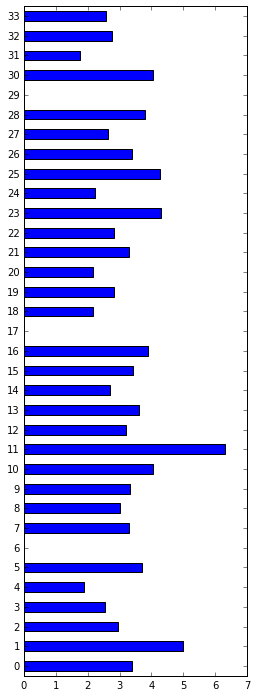

In [37]:
docs[2013].plot.barh(figsize=(4, 12)) 

<a id='selection'></a>

## Selecting variables and observations 

The word **selection** refers to choosing a subset of variables or observations using their labels or index.  Similar methods are sometimes referred to as **slicing**, **subsetting**, **indexing**, or **filtering**.  We'll treat the terms as synonymous.  

There are lots of ways to do this.  Mostly we do "Boolean" selection, which we address in the next section.  We review more direct options here, mostly at high speed because they're not things we use much.  

In the outline below, `df` is a dataframe, `var` and `varn` are variable names, `vlist = ['var1', 'var2']` is a list of variable names, and `nlist = [0, 3, 4]` is a list of numerical variable or observation indexes, `n1` and `n2` are integers, and `bools` ia a list or pandas `Series` of booleans (`True` and `False`).  Some of the basic selection/indexing/slicing methods have the form:  

* `df[var]` extracts a variable -- a series, in other words.
* `df[vlist]` extracts a new dataframe consisting of the variables in `vlist`.  
* `df[nlist]` does the same thing.  
* `df[bools]`: extracts each _row_ where the corresponding element in `bools` is true. `len(bools)` must be equal to `df.size[0]`
* `df[n1:n2]` extracts observations `n1` to `n2-1`, the traditional slicing syntax.  

We find the last one confusing:  it extracts rows, not columns.  Pandas guru Wes McKinney notes: "This might seem inconsistent to some readers."  Yup!  We don't do it much, partly for that reason.  

<!-- page 127 top -->

The Pandas docs push the `loc` and `iloc` methods.  We'll ignore them -- we don't use them much -- but if you're interested, see [the docs](http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing).    

In [38]:
# we create a small dataframe to experiment with 
small = weo.head()
small

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,386.368,440.336,457.654,463.520,472.981
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,6.479,13.968,3.933,1.282,2.041
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361
3,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",U.S. dollars,17.890,20.296,20.170,20.444,19.681
4,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",Index,216.432,234.728,244.033,253.103,247.866


**Example.** Let's try each of these in a different cell and see what they do:  
    
* `small[['ISO', 'Units']]`
* `small[[0, 4]]`
* `small['2011']`
* `small[1:3]`

Can you explain the results?

In [39]:
small[['ISO', 'Units']]

,ISO,Units
0,AFG,National currency
1,AFG,Percent change
2,AFG,National currency
3,AFG,U.S. dollars
4,AFG,Index


In [40]:
small[[0, 4]]

,ISO,Units
0,AFG,National currency
1,AFG,Percent change
2,AFG,National currency
3,AFG,U.S. dollars
4,AFG,Index


In [41]:
small['2011']

0    386.368
1      6.479
2    836.222
3     17.890
4    216.432
Name: 2011, dtype: float64

In [42]:
small['2011'][3]

17.890000000000001

In [43]:
small[1:3]

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,6.479,13.968,3.933,1.282,2.041
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361


In [44]:
small[[False, True, True, False, False]]

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,6.479,13.968,3.933,1.282,2.041
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361


### Series indexing

Indexing a `Series` is a little different because we only have one column, so all indexing operations interact with rows.

The rules here are a little subtle, so we'll show examples and add comments that explain what each example does

In the list below `s` is a `Series`, `n` is an integer, `nlist = [0, 3]` is a list of integers, and `i` is a string, and `is` is a list of strings

- `s[n]`: if the index has `dtype` int, this extracts the row with index `n`. Otherwise extracts the `n`th row (starting at zero)
- `s[nlist]`: if the index has `dtype` int, this extracts rows with indices in `nlist` returning `NaN` if they don't appear. Otherwise extracts the rows at positions in `nlist`, filling with `NaN` for invalid positions
- `s[i]`: if the index has `dtype` `object`, this extracts the row with index `i`, otherwise it is an error
- `s[is]`: 

In [53]:
s1 = pd.Series([5, 6, 7, 8], index=["a", "b", "c", "d"])
s1

a    5
b    6
c    7
d    8
dtype: int64

In [66]:
s2 = pd.Series([50, 60, 70, 80], index=[0, 4, 2, 999])
s2

0      50
4      60
2      70
999    80
dtype: int64

In [65]:
# index has dtype object, so using an int returns the value in that row (starting at 0)
s1[1]

5

In [68]:
# index has dtype int, so using an integer tries to find the that int in the 
# index and return the corresponding value and throws an error if it can't find it
s2[1]

KeyError: 1

In [69]:
s2[0]  # no error, 0 is in the index

50

In [71]:
# index has dtype object, so a list of ints extracts those rows
s1[[0, 3]]

a    5
d    8
dtype: int64

In [73]:
# index has dtype int, so a list of ints tries to match each int to the index
# it returns NaN where it can't find the index. Notice it **did not** return 
# `80` for 3
s2[[0, 3, 999]]

0      50
3     NaN
999    80
dtype: float64

In [74]:
# index has type object, so a string finds row with matching index
s1["c"]

7

In [76]:
# index has dtype int, so using a string causes an error
s2["c"]

KeyError: 'c'

In [78]:
# similar behavior for lists of strings
s1[["a", "b", "penguin"]]

a           5
b           6
penguin   NaN
dtype: float64

In [80]:
# index has dtype int, so list of strings returns NaN's everywhere
s2[["a", "b"]]

a   NaN
b   NaN
dtype: float64

In [81]:
# lists of True/False work the same for any dtype of index
bools = [True, False, False, True]
s1[bools]

a    5
d    8
dtype: int64

In [82]:
s2[bools]

0      50
999    80
dtype: int64

<a id='boolean'></a>

## Boolean selection  

This is mostly what we do:  we choose observations that satisfy one or more conditions.  Boolean selection consists of two steps that we typically combine in one statement:

* Use a comparison to construct a Boolean variable consisting of True and False.  
* Compute `df[comparison]`, where `df` is a dataframe and `comparison` is a comparison.  This will select the observations (rows) for which `comparison` is true and throw away the others. 

We work through this one step at a time:  

* Example:  apply the want operator  
* Comparisons for dataframes 
* Boolean selection:  select observations for which the comparison is `True`
* The `isin` method

This is easier to describe with an example.  

### Example:  Apply the want operator to WEO

Our **want** here is to take the `weo` dataframe and extract government debt and deficits for a given set of countries.  Putting this to work involves several steps.  

Here's the head of the dataframe to remind us what we're dealing with.  

In [46]:
weo.head()

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,386.368,440.336,457.654,463.520,472.981
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,6.479,13.968,3.933,1.282,2.041
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361
3,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",U.S. dollars,17.890,20.296,20.170,20.444,19.681
4,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",Index,216.432,234.728,244.033,253.103,247.866


**Find variable and country codes.** Which ones do we want?  Let's start by seeing that's available.  Here we create special dataframes that include all the variables and their definitions and all the countries.  

Note the use of the `drop_duplicates` method, which does what it sounds like.    

In [47]:
variable_list = weo[['WEO Subject Code', 'Subject Descriptor', 'Units']].drop_duplicates()
print('Number of variables: ', variable_list.shape[0])
variable_list.head()

Number of variables:  45


,WEO Subject Code,Subject Descriptor,Units
0,NGDP_R,"Gross domestic product, constant prices",National currency
1,NGDP_RPCH,"Gross domestic product, constant prices",Percent change
2,NGDP,"Gross domestic product, current prices",National currency
3,NGDPD,"Gross domestic product, current prices",U.S. dollars
4,NGDP_D,"Gross domestic product, deflator",Index


In [48]:
country_list = weo[['ISO', 'Country']].drop_duplicates()
print('Number of countries: ', country_list.shape[0])
country_list.head()

Number of countries:  190


,ISO,Country
0,AFG,Afghanistan
44,ALB,Albania
88,DZA,Algeria
132,AGO,Angola
176,ATG,Antigua and Barbuda


**Exercise.** 

* Construct a list of countries with `countries = weo[['ISO', 'Country']]`; that is, without applying the `drop_duplicates` method.  How large is it?  How many duplicates have we dropped?  
* What are the country codes (`ISO`) for Argentina and the United States?  
* What are the variable codes (`WEO Subject Code`) for government debt (gross debt, percent of GDP) and net lending/borrowing (also percent of GDP)?  

**Comment.** Now that we have the country and variable codes, we can be more explicit about what we want.  We want observations with those country and variable codes.  

We work up to the solution one step at a time.  

### Comparisons for series 

We can construct comparisons for series (dataframe columns) much as we did with simple variables.  The difference is that we get a complete column of True/False responses, not just one.  

Mutiple comparisons have a different syntax than we saw earlier: `and` is replaced by `&`, and `or` is replaced by `|`.  And when we have more than one comparison, we need to enclose them in parentheses.  

**Examples.**  Consider the comparisons:  

* `small['Units'] == 'National currency'`
* `small['2011'] >= 100`
* `(small['Units'] == 'National currency') & (small['2011'] >= 100)`
* `(small['Units'] == 'National currency') | (small['2011'] >= 100)`

Remind yourself what the `&` and `|` do.

In [49]:
small['Units'] == 'National currency'

0     True
1    False
2     True
3    False
4    False
Name: Units, dtype: bool

In [50]:
small['2011'] >= 100

0     True
1    False
2     True
3    False
4     True
Name: 2011, dtype: bool

In [51]:
(small['Units'] == 'National currency') & (small['2011'] >= 100)

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [52]:
(small['Units'] == 'National currency') | (small['2011'] >= 100)

0     True
1    False
2     True
3    False
4     True
dtype: bool

### Boolean selection

Boolean selection simply chooses those observations for which a condition is `True`.  Some people refer to this as filtering.  The syntax is 

```python
df[comparison]
```

The result is a new dataframe of observations in which `comparison` is true.  

**Example.**  We choose obervations for which the units are `'National currency'`.  We do this first in two steps, then in one.  

In [69]:
# remind ourslves what we're starting with 
small

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,386.368,440.336,457.654,463.520,472.981
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,6.479,13.968,3.933,1.282,2.041
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361
3,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",U.S. dollars,17.890,20.296,20.170,20.444,19.681
4,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",Index,216.432,234.728,244.033,253.103,247.866


In [68]:
# two steps:  comparison, then selection 
ncunits = small['Units'] == 'National currency'   # comparison
print(ncunits)
small[ncunits]                                    # selection

0     True
1    False
2     True
3    False
4    False
Name: Units, dtype: bool


,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,386.368,440.336,457.654,463.520,472.981
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361


In [70]:
# put the steps together in one line 
small[small['Units'] == 'National currency']

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,386.368,440.336,457.654,463.520,472.981
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,836.222,1033.591,1116.827,1173.182,1172.361


**Exercise.** Construct dataframes for which 

* `small['Units']` does **not** equal `'National currency'`.
* `small['Units']` equals `'National currency'` and `small['2011']` is greater than 100.  

<a id='isin'></a>

## The `isin` method

Pay attention now, this is really useful.  Suppose we want to extract the data for which `weo['ISO'] == 'ARG'` (Argentina) or `weo['ISO'] == 'GRC'` (Greece).  We could do that by combining the comparisons:  

```python
(weo['ISO'] == 'ARG') | (weo['ISO'] == 'GRC')
```

Remind youself that `|` stands for "or."  (What do we use for "and"?) 

A simpler approach is to apply the `isin` method to a variable.  This sets the comparison equal to `True` if the value of the observation is of `weo['ISO']` equals any element in a list.  We could do the same thing using mulitple comparisons, but this is a lot easier.  

Let's see how this works.  

**Example.**  Let's apply the same logic to variable codes.  If we want to extract the observations with codes 
```
vlist = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
```

we would use 

In [55]:
vlist = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
weo['WEO Subject Code'].isin(vlist).head(45)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44    False
Name: WEO Subject Code, dtype: bool

**Comment.** We're choosing 2 variables from 45, so there are lots of Falses.

In [56]:
# this time let's use the result of isin for selection 
vlist = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
weo[weo['WEO Subject Code'].isin(vlist)].head(6)

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
32,AFG,GGXCNL_NGDP,Afghanistan,General government net lending/borrowing,Percent of GDP,-0.646,0.182,-0.629,-1.733,-0.251
40,AFG,GGXWDG_NGDP,Afghanistan,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN
76,ALB,GGXCNL_NGDP,Albania,General government net lending/borrowing,Percent of GDP,-3.516,-3.434,-5.159,-5.414,-5.074
84,ALB,GGXWDG_NGDP,Albania,General government gross debt,Percent of GDP,59.413,62.020,70.091,72.522,73.305
120,DZA,GGXCNL_NGDP,Algeria,General government net lending/borrowing,Percent of GDP,-0.436,-4.089,-0.400,-7.331,-13.682
128,DZA,GGXWDG_NGDP,Algeria,General government gross debt,Percent of GDP,9.942,9.944,8.278,8.788,10.188


In [57]:
# we've combined several things in one line
comparison = weo['WEO Subject Code'].isin(vlist) 
selection  = weo[comparison]
selection.head(6)

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
32,AFG,GGXCNL_NGDP,Afghanistan,General government net lending/borrowing,Percent of GDP,-0.646,0.182,-0.629,-1.733,-0.251
40,AFG,GGXWDG_NGDP,Afghanistan,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN
76,ALB,GGXCNL_NGDP,Albania,General government net lending/borrowing,Percent of GDP,-3.516,-3.434,-5.159,-5.414,-5.074
84,ALB,GGXWDG_NGDP,Albania,General government gross debt,Percent of GDP,59.413,62.020,70.091,72.522,73.305
120,DZA,GGXCNL_NGDP,Algeria,General government net lending/borrowing,Percent of GDP,-0.436,-4.089,-0.400,-7.331,-13.682
128,DZA,GGXWDG_NGDP,Algeria,General government gross debt,Percent of GDP,9.942,9.944,8.278,8.788,10.188


**Comment.** We can do the same thing with countries.  If we want to choose two variables **and** three countries, the code looks like:  

In [58]:
variables = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
countries = ['ARG', 'DEU', 'GRC']
weo_sub = weo[weo['WEO Subject Code'].isin(variables) & weo['ISO'].isin(countries)]
weo_sub

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,2011,2012,2013,2014,2015
252,ARG,GGXCNL_NGDP,Argentina,General government net lending/borrowing,Percent of GDP,-1.949,-2.359,-1.997,-2.689,-4.852
260,ARG,GGXWDG_NGDP,Argentina,General government gross debt,Percent of GDP,35.763,37.328,40.217,45.282,52.137
2716,DEU,GGXCNL_NGDP,Germany,General government net lending/borrowing,Percent of GDP,-0.861,0.091,0.133,0.306,0.511
2724,DEU,GGXWDG_NGDP,Germany,General government gross debt,Percent of GDP,77.928,79.311,76.978,74.621,70.746
2804,GRC,GGXCNL_NGDP,Greece,General government net lending/borrowing,Percent of GDP,-10.215,-6.406,-2.944,-3.914,-4.171
2812,GRC,GGXWDG_NGDP,Greece,General government gross debt,Percent of GDP,170.960,156.494,174.951,177.054,196.950


**Comments.**

* We've now done what we described when we applied the want operator. 
* This is a go-to method.  Circle it for later reference.  
* **This is a go-to method.  Circle it for later reference.**  

**Exercise.** Use the `isin` method to extract *Gross domestic product in US dollars* for China, India, and the United States.  Assign the result to the dataframe `gdp`.  *Hint:*  You can adapt the code we just ran. The variable code is NGDPD.  The country codes are CHN, IND, and USA.  

**Exercise (challenging).** Plot the variable `gdp['2015']` as a bar chart.  What would you say it needs?  

<a id='contains'></a>

## The `contains` method

Another useful one.  The `contains` string method for series identifies observations that contain a specific string.  If yes, the observation is labelled True, if no, False.  A little trick converts the True/False outcomes to ones and zeros.  

We apply it to the `Media` variable of the Entry Poll dataframe `ep`.  You may recall that this variable could have more than one response.  We tease them apart with the `contains` method.  Our want is to have a yes/no variable for each response.  

In [59]:
# recall
ep['Media'].head(10)

0                          Twitter
1                          Twitter
2                         Facebook
3                             None
4                          Twitter
5                          Twitter
6                             None
7                             None
8                             None
9    Blog (RSS) reader, Backtweets
Name: Media, dtype: object

In [60]:
# the contains method
ep['Media'].str.contains('Twitter').head(10)

0     True
1     True
2    False
3    False
4     True
5     True
6    False
7    False
8    False
9    False
Name: Media, dtype: object

**Comment.** That's pretty good, we now know which students mentioned Twitter and which did not.  It's more useful, though, to convert this to zeros (False) and ones (True), which we do with this trick:  we multiply by 1.  

In [61]:
ep['Media'].str.contains('Twitter').head(10)*1

0    1
1    1
2    0
3    0
4    1
5    1
6    0
7    0
8    0
9    0
Name: Media, dtype: object

**Comment.** Now let's do the same for some of the other entries and save them in new variables.  

In [62]:
media = ['None', 'Twitter', 'Facebook', 'Blog'] 
oldep = ep.copy()

vnames = []
for x in media:
    newname = 'Media' + ':' + x 
    vnames.append(newname)
    ep[newname] = ep['Media'].str.contains(x)*1
    
vnames    

['Media:None', 'Media:Twitter', 'Media:Facebook', 'Media:Blog']

**Comment.** You might want to think about this a minute.  Or two.  

In [64]:
# create new df of just these variables 
media = ep[vnames]
media.head()

,Media:None,Media:Twitter,Media:Facebook,Media:Blog
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,1,0,0


In [65]:
# count them with the sum method 
media_counts = media.sum()
media_counts

Media:None        46.0
Media:Twitter     36.0
Media:Facebook     9.0
Media:Blog        11.0
dtype: float64

**Comment.** Just for fun, here's a bar graph of the result.  

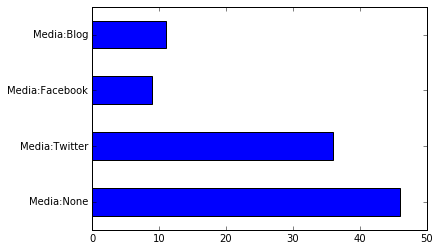

In [66]:
media_counts.plot.barh()

**Exercise.** What would you change in this graph?  How would you do it?  (Words are enough.) 

## Review

Let's remind ourselves what we've learned.  

**Exercise.** We explore the Census's [Business Dynamics Statistics](http://www.census.gov/ces/dataproducts/bds/), a huge collection of data about firms. We've extracted a small piece of one of their databases that includes these variables for 2013:

* Size: size category of firms based on number of employees
* Firms: number of firms in each size category
* Emp: number of employees in each size category

Run the code cell below to load the data.  

In [67]:
data = {'Size': ['a) 1 to 4', 'b) 5 to 9', 'c) 10 to 19', 'd) 20 to 49', 'e) 50 to 99',
                 'f) 100 to 249', 'g) 250 to 499', 'h) 500 to 999', 'i) 1000 to 2499',
                 'j) 2500 to 4999', 'k) 5000 to 9999', 'l) 10000+'], 
        'Firms': [2846416, 1020772, 598153, 373345, 115544, 63845,
                  19389, 9588, 6088, 2287, 1250, 1357], 
        'Emp': [5998912, 6714924, 8151891, 11425545, 8055535, 9788341, 
                6611734, 6340775, 8321486, 6738218, 6559020, 32556671]}
bds = pd.DataFrame(data) 
bds .head(3) 

,Emp,Firms,Size
0,5998912,2846416,a) 1 to 4
1,6714924,1020772,b) 5 to 9
2,8151891,598153,c) 10 to 19


Use the dataframe `bds` to:  

* Compute the mean number of firms with `nbar = bds['Firms'].mean()`. 
* Generate the new variable `bds['AboveMean']` that is `True` if the value of `bds['Firms']` is above the mean, `False` otherwise. 
* What dtype is this new variable?  
* Select the observations for which the number of firms is above the mean.  
* *Challenging.*  Fix the size categories.  Specifically, use a string method to eliminate the prefixes `a)`, `b)`, etc.  That is, change `a) 1 to 4` to `1 to 4`, `b) 5 to 9` to `5 to 9`, and so on.  *Hint:* Use the `split` method.  